In [1]:
import pystare
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs
import numpy
import datetime
import xarray
import starepandas
import geopandas
import pystare

## Plotting Pods

In [2]:
level = 4

level_increment = pystare.spatial_increment_from_level(level)
n_trixels = 8 * (4 ** level)
r_ = numpy.arange(n_trixels)
sids = r_ * level_increment+level    

lons, lats, intmat = pystare.triangulate_indices(sids)
all_trixels = tri.Triangulation(lons, lats, intmat)

In [3]:
lons.shape[0]

6144

In [4]:
pods = starepandas.STAREDataFrame(sids=sids, add_trixels=True)

<GeoAxesSubplot:>

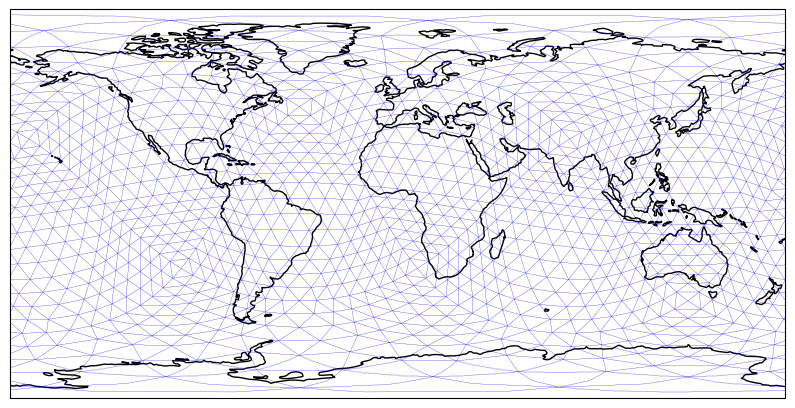

In [5]:
proj = cartopy.crs.PlateCarree()
opts = {'projection': proj}

transf = cartopy.crs.Geodetic()

fig, ax = plt.subplots(figsize=(10, 10), dpi=100, subplot_kw=opts)
ax.coastlines()
ax.set_extent([-179, 180, 90, -90])

pods.plot(ax=ax, trixels=True, transform=transf, lw=0.1, color='b')

# Plotting Orbits

In [6]:
fname = '/tablespace/xcal/SSMIS/1C.F16.SSMIS.XCAL2016-V.20210110-S002714-E020909.088907.V05A.HDF5'
granule = starepandas.io.granules.SSMIS(fname)
granule.read_sidecar_cover(granule.guess_sidecar_path())
ssmis_f16 = starepandas.STAREDataFrame(sids=[granule.stare_cover])
ssmis_f16.set_trixels(ssmis_f16.make_trixels(), inplace=True)

In [7]:
fname = '/tablespace/xcal/SSMIS/1C.F16.SSMIS.XCAL2016-V.20210110-S020910-E035104.088908.V05A.HDF5'
granule = starepandas.io.granules.ATMS(fname)
granule.read_sidecar_cover(granule.guess_sidecar_path())
atms_noaa20 = starepandas.STAREDataFrame(sids=[granule.stare_cover])
atms_noaa20.set_trixels(atms_noaa20.make_trixels(), inplace=True)

<GeoAxesSubplot:>

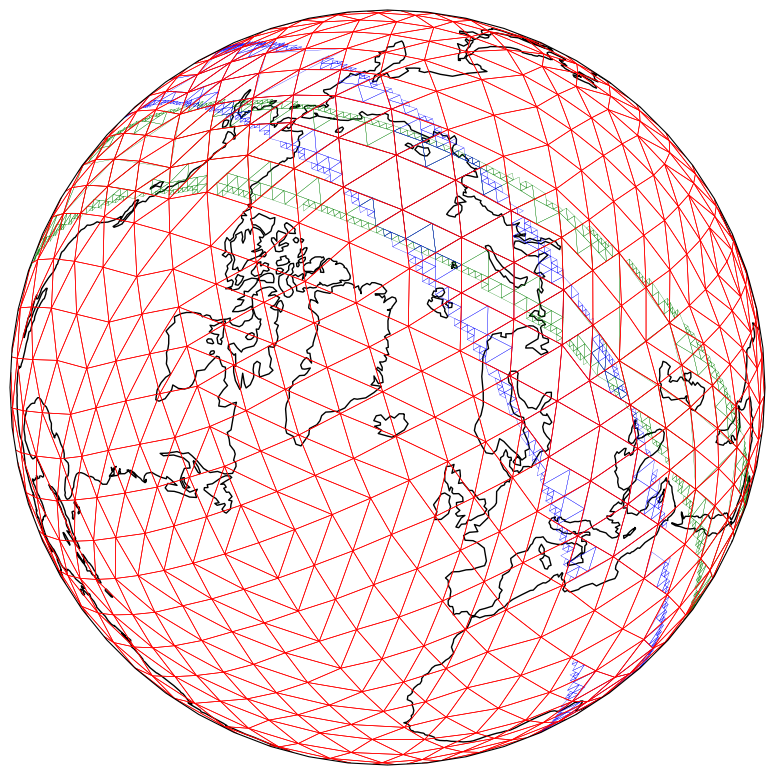

In [8]:
proj = cartopy.crs.PlateCarree()
proj = cartopy.crs.NearsidePerspective(central_longitude=-20, central_latitude=70)
opts = {'projection': proj}

fig, ax = plt.subplots(figsize=(10, 10), dpi=100, subplot_kw=opts)
ax.coastlines()
#ax.set_extent([-179, 180, 90, -90])

transf = cartopy.crs.Geodetic()
ssmis_f16.plot(ax=ax, trixels=True, transform=transf, lw=0.2, color='g')
atms_noaa20.plot(ax=ax, trixels=True, transform=transf, lw=0.2, color='b')

pods.plot(ax=ax, trixels=True, transform=transf, lw=0.5, color='r')

## Zoom-in to iFOVs

In [11]:
fname = '/tablespace/xcal/ATMS/1C.NOAA20.ATMS.XCAL2019-V.20210110-S032046-E050215.016299.V05B.HDF5'
granule1 = starepandas.read_granule(fname, latlon=False, sidecar=True)['S1']
granule1.set_trixels(granule1.make_trixels(n_workers=600), inplace=True)

In [12]:
fname = '/tablespace/xcal/ATMS/1C.NOAA20.ATMS.XCAL2019-V.20210110-S013916-E032045.016298.V05B.HDF5'
granule2 = starepandas.read_granule(fname, latlon=False, sidecar=True)['S1']
granule2.set_trixels(granule2.make_trixels(n_workers=600), inplace=True)

<GeoAxesSubplot:>

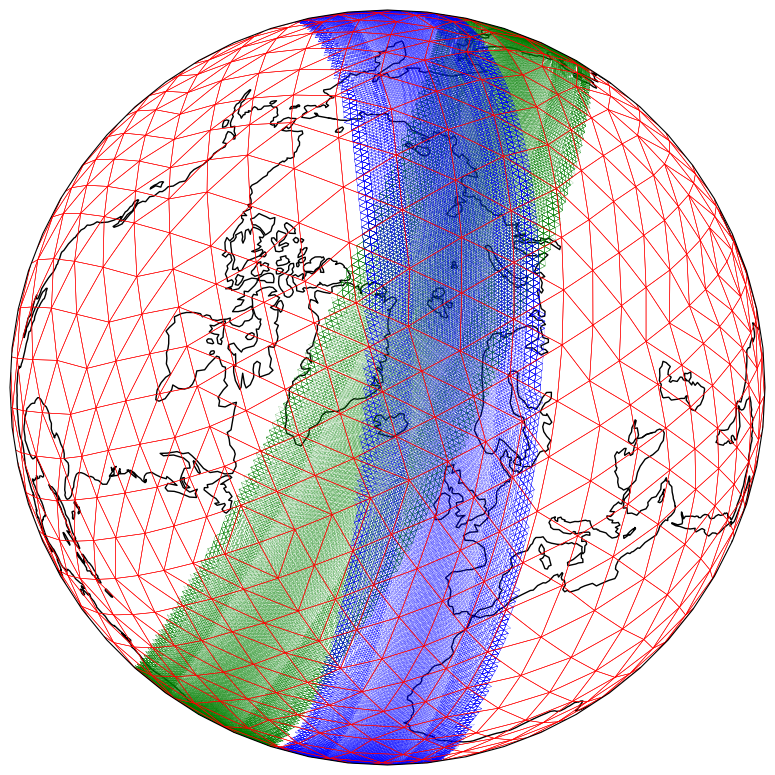

In [16]:
proj = cartopy.crs.PlateCarree()
proj = cartopy.crs.NearsidePerspective(central_longitude=-20, central_latitude=70)
opts = {'projection': proj}

fig, ax = plt.subplots(figsize=(10, 10), dpi=100, subplot_kw=opts)
ax.coastlines()
#ax.set_extent([-160, -120, 70, 40])

transf = cartopy.crs.Geodetic()
granule1.plot(ax=ax, trixels=True, transform=transf, lw=0.1, color='g')
granule2.plot(ax=ax, trixels=True, transform=transf, lw=0.1, color='b')

pods.plot(ax=ax, trixels=True, transform=transf, lw=0.4, color='r')

# USA

In [7]:
gdf = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))#, rows=slice(120, 130))
gdf = gdf[gdf.name =='United States of America']

roi = starepandas.STAREDataFrame(gdf)
roi.set_stare(roi.make_stare(level=level), inplace=True)
roi.set_trixels(roi.make_trixels(), inplace=True)

# Make a catalog of a small collection of granules

In [9]:
fname = 'files/'
sdf = starepandas.folder2catalog(fname)
sdf.set_trixels(sdf.make_trixels(), inplace=True)

<GeoAxesSubplot:>

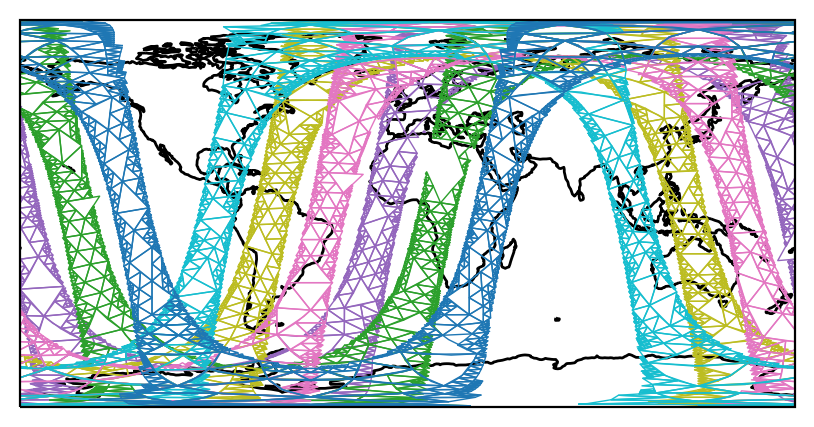

In [10]:
proj = cartopy.crs.PlateCarree()
opts = {'projection': proj}

transf = cartopy.crs.Geodetic()

fig, ax = plt.subplots(figsize=(5,5), dpi=200, subplot_kw=opts)
ax.coastlines()

sdf.plot(ax=ax, trixels=True, transform=transf, lw=0.5, column='granule_path')

# Granule

In [ ]:
fname = 'files/1C.F16.SSMIS.XCAL2016-V.20210110-S002714-E020909.088907.V05A.HDF5'
ds = starepandas.read_granule(fname, latlon=True, sidecar=True)

df = ds['S1']
df['stare6'] = df.to_stare_resolution(resolution=6, clear_to_resolution=True)
grouped = df.groupby('stare6')
pods = list(grouped.groups.keys())
lons, lats, intmat = pystare.triangulate_indices(pods)
trixels_pods_s1 = tri.Triangulation(lons, lats, intmat)

df = ds['S2']
df['stare6'] = df.to_stare_resolution(resolution=6, clear_to_resolution=True)
grouped = df.groupby('stare6')
pods = list(grouped.groups.keys())
lons, lats, intmat = pystare.triangulate_indices(pods)
trixels_pods_s2 = tri.Triangulation(lons, lats, intmat)
               
df = ds['S3']
df['stare6'] = df.to_stare_resolution(resolution=6, clear_to_resolution=True)
grouped = df.groupby('stare6')
pods = list(grouped.groups.keys())
lons, lats, intmat = pystare.triangulate_indices(pods)
trixels_pods_s3 = tri.Triangulation(lons, lats, intmat)
               
df = ds['S4']
df['stare6'] = df.to_stare_resolution(resolution=6, clear_to_resolution=True)
grouped = df.groupby('stare6')
pods = list(grouped.groups.keys())
lons, lats, intmat = pystare.triangulate_indices(pods)
trixels_pods_s4 = tri.Triangulation(lons, lats, intmat)

# Intersection

In [16]:
intersection = pystare.intersect(pods, sdf['stare_cover'].iloc[0], multiresolution=False)

In [17]:
lons, lats, intmat = pystare.triangulate_indices(intersection)
trixels_is = tri.Triangulation(lons, lats, intmat)

# Plot

In [25]:
df

,lat,lon,stare,timestamp,Tc1,Tc2,stare6
0,-72.816452,-40.896088,2299427423276743818,2021-01-10 00:27:16.000461,195.979996,187.889999,2299369084749348870
1,-72.833939,-41.291138,2299432349860393578,2021-01-10 00:27:16.000461,194.309998,186.520004,2299369084749348870
2,-72.852272,-41.686157,2299416294910650858,2021-01-10 00:27:16.000461,193.580002,186.220001,2299369084749348870
3,-72.871460,-42.081177,2299421509761955146,2021-01-10 00:27:16.000461,196.089996,185.970001,2299369084749348870
4,-72.891479,-42.476135,2299420369969033386,2021-01-10 00:27:16.000461,194.419998,186.910004,2299369084749348870
...,...,...,...,...,...,...,...
579775,-86.503166,-128.926056,2284141335018307338,2021-01-10 02:09:10.000288,218.520004,197.820007,2284028698518618118
579776,-86.620064,-129.037567,2284166652982422602,2021-01-10 02:09:10.000288,221.479996,201.380005,2284028698518618118
579777,-86.737022,-129.128616,2284165766783109802,2021-01-10 02:09:10.000288,224.589996,204.839996,2284028698518618118
579778,-86.854034,-129.196808,2284149005944647274,2021-01-10 02:09:10.000288,226.020004,209.110001,2284028698518618118


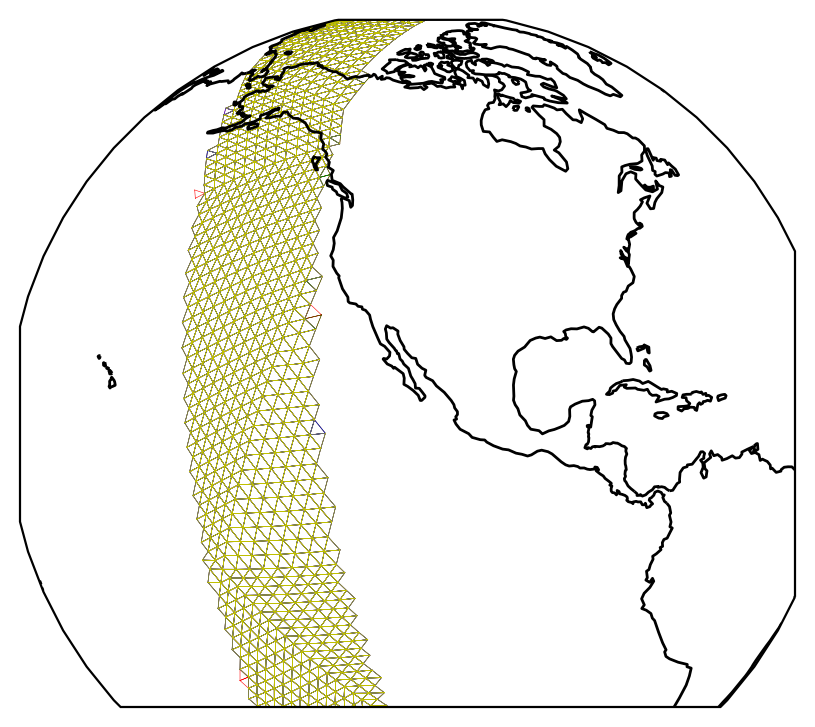

In [23]:
proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)
#proj = cartopy.crs.PlateCarree()
opts = {'projection': proj}

transf = cartopy.crs.Geodetic()

fig, ax = plt.subplots(figsize=(5,5), dpi=200, subplot_kw=opts)
ax.coastlines()
ax.set_extent([-179, -50, 90, -90])

#sdf.plot(ax=ax, trixels=True, transform=transf, lw=0.5, color='b')
#ax.triplot(all_trixels, 'r-', transform=transf, lw=0.1, markersize=0, color='y')  
ax.triplot(trixels_pods_s1, 'r-', transform=transf, lw=0.2, markersize=0, color='r')  
ax.triplot(trixels_pods_s2, 'r-', transform=transf, lw=0.2, markersize=0, color='g')  
ax.triplot(trixels_pods_s3, 'r-', transform=transf, lw=0.2, markersize=0, color='b')  
ax.triplot(trixels_pods_s4, 'r-', transform=transf, lw=0.2, markersize=0, color='y')  
#ax.triplot(trixels_is, 'r-', transform=transf, lw=0.2, markersize=0, color='magenta', zorder=10)  